# Building a linear regression model to predict housing prices

Dataset: Dataset related to housing in Boston which contains various features for regression tasks - (https://www.kaggle.com/competitions/boston-housing/data) 

In [12]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and explore the dataset, including visualizing the features and target variable.

In [2]:
# READ DATASET
data = pd.read_csv(r"F:\train.csv")
data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [3]:
# Loading Testing DATASET
tsdata = pd.read_csv(r"F:\train.csv")
tsdata

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [4]:
# Get the column names from the DataFrame
columns = data.columns
# Calculate the number of columns
num_columns = len(columns)

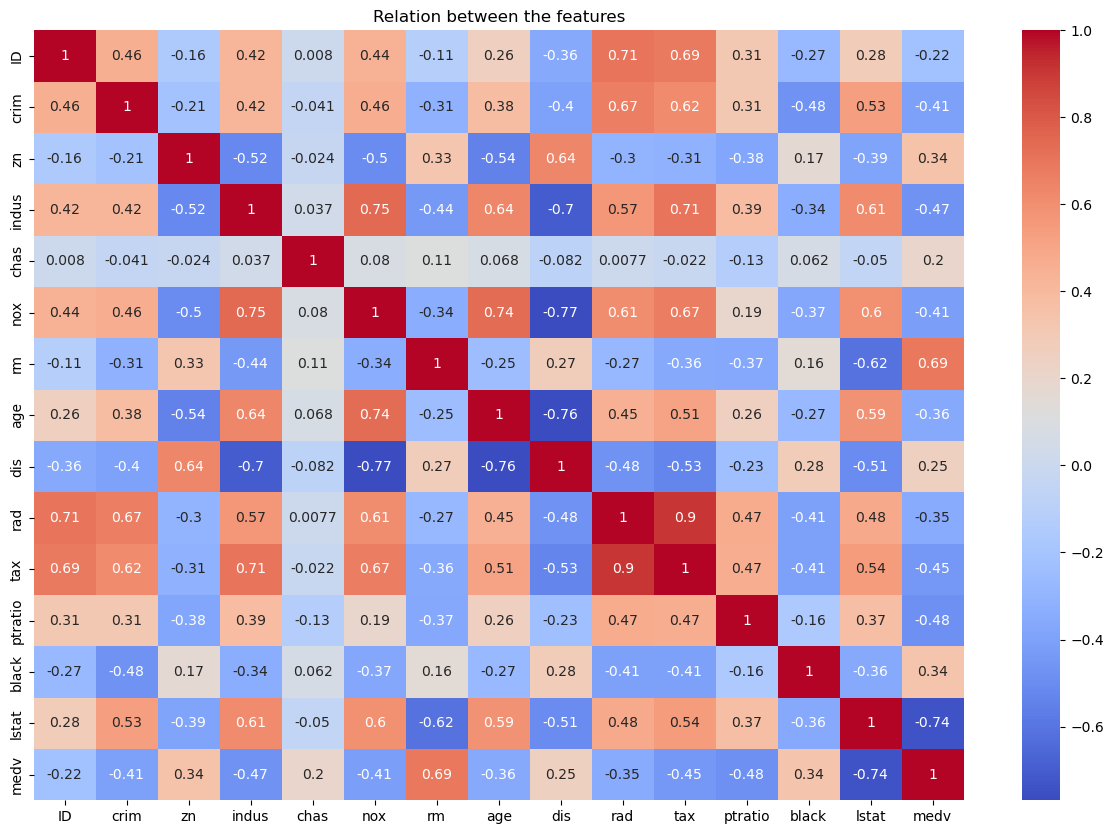

In [5]:
#CORELATIONAL MATRIX
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Relation between the features')
plt.show()

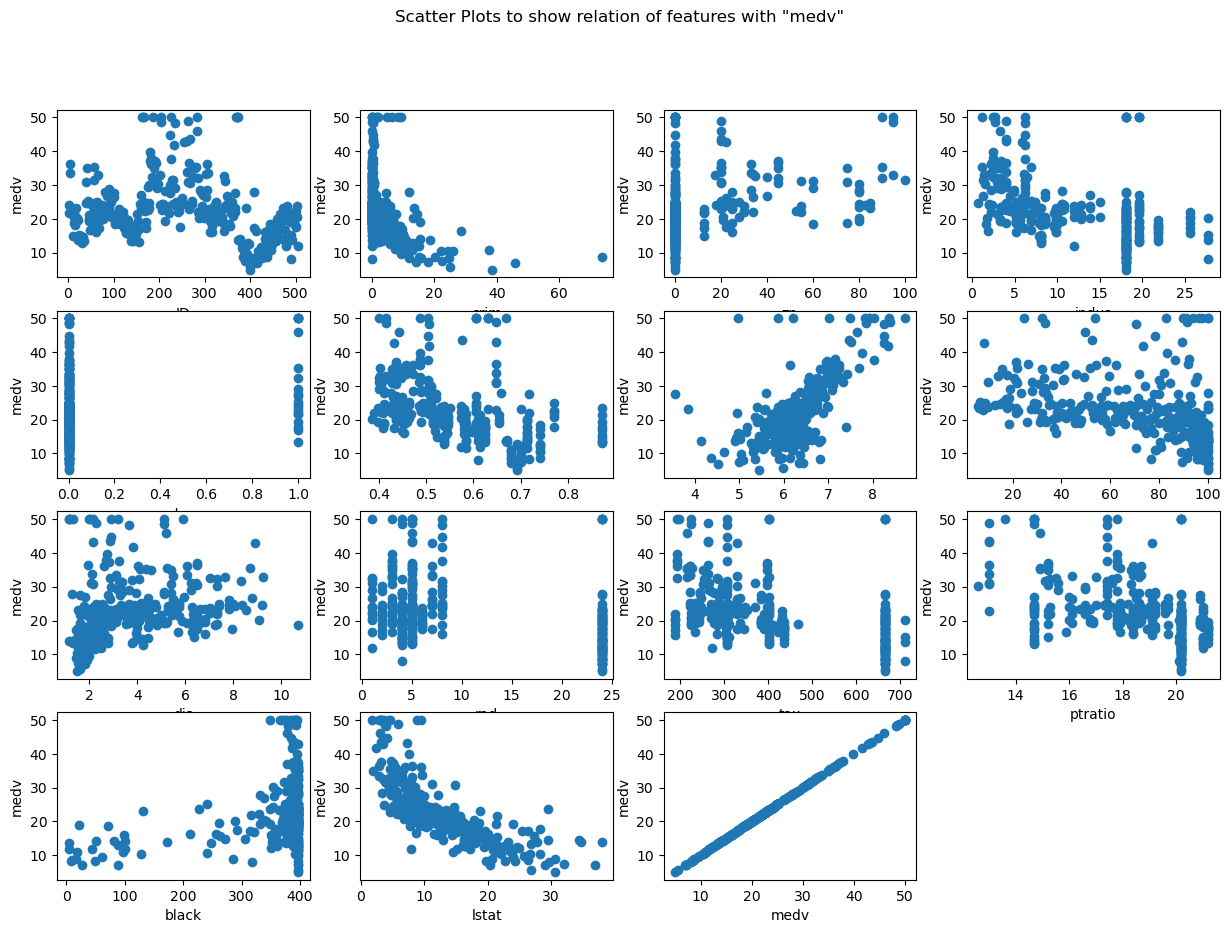

In [6]:
# Scatter plot for each feature while considering 'medv' is target variable
fig, axs = plt.subplots(4,4, figsize=(15,10))
axs = axs.flatten()
fig.suptitle('Scatter Plots to show relation of features with "medv"') 

for i, feature in enumerate(columns):
        axs[i].scatter(data[feature], data['medv'])
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('medv')

# Removing extra subplots
if num_columns< len(axs):
    for j in range(num_columns, len(axs)):
        fig.delaxes(axs[j])
        
plt.show()

# Step 2: Split the dataset into training and testing sets.

In [13]:
# Separating the features and the target variable in the training set
X_train = data.drop('medv', axis=1)
y_train = data['medv']

# Using the test set for predictions or evaluation
X_test = tsdata.drop('medv', axis=1)
y_test = tsdata['medv']

# Step 3: Preprocess the data by handling missing values and performing feature scaling.

In [8]:
# Reshaping the target variable to 2D Array
y_train = np.array(y_train).reshape(-1, 1)

# Replacing missing values with the data's mean
imputer = SimpleImputer(strategy='mean')  
X_imp = imputer.fit_transform(X_train)
Y_imp = imputer.fit_transform(X_test)

In [9]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X_imp)
Y = scaler.fit_transform(Y_imp)

## Step 4: Train a linear regression model on the training data.

In [18]:
model = LinearRegression()
model.fit(X,y_train)

LinearRegression()

## Step 5: Evaluate the model's performance on the testing data using metrics such as mean squared error (MSE) or R-squared.

In [26]:
# Making predictions on the testing data
y_pred = model.predict(Y)

# mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 1.3422717042260586e-27
R-squared: 1.0
